In [1]:
from models.SklearnClassifier import SklearnClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import utils
from pprint import pprint
import time
from Embeddings import Embeddings

# Create the embeddings object
embeddings = Embeddings('../data/doc2vec.npy', '../data/bert.npy', '../data/authors.npy', '../data/authors_encoded.npy', '../pickles/author_encoder.pkl')

In [2]:
def run_knn(X, y, figure_title, scale_features=True):
    if scale_features:
        X = utils.scale_feature_matrix(X)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Find the best hyperparameters
    params = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [10, 20, 30, 40, 50],
        'p': [1, 2]
    }
    
    clf = SklearnClassifier(KNeighborsClassifier(n_jobs=-1))
    # Find the best hyperparameters
    start = time.time()
    clf.hyperparameter_tuning(X_train, y_train, params)
    print('Hyperparameter tuning and training time: ', time.time() - start)
    # Print the best hyperparameters
    print('Best hyperparameters: ', clf.get_best_hyperparams())
    
    # Evaluate the model
    pprint(clf.evaluate(X_test, y_test))
    
    # Get the confusion matrix
    clf.get_confusion_matrix(X_test, y_test, figure_title)

In [3]:
# Load the Doc2Vec feature matrix and labels
X = embeddings.get_doc2vec()
y = embeddings.get_labels()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Hyperparameter tuning and training time:  66.2019476890564
Best hyperparameters:  {'weights': 'distance', 'p': 1, 'n_neighbors': 7, 'leaf_size': 10, 'algorithm': 'kd_tree'}
{'Accuracy': 0.2972040041422161,
 'F1': 0.28013224825053784,
 'Precision': 0.4011171989337271,
 'Recall': 0.2972040041422161}


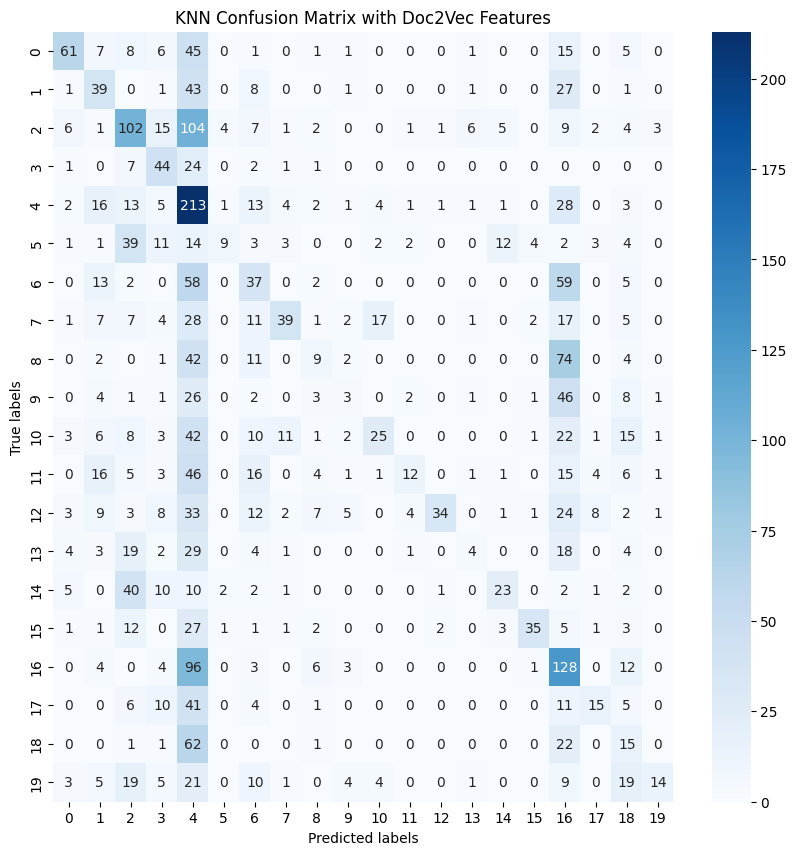

In [4]:
run_knn(X, y, 'KNN Confusion Matrix with Doc2Vec Features', scale_features=True)

In [5]:
X = embeddings.get_bert()
y = embeddings.get_labels()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Hyperparameter tuning and training time:  53.2592613697052
Best hyperparameters:  {'weights': 'distance', 'p': 1, 'n_neighbors': 7, 'leaf_size': 10, 'algorithm': 'kd_tree'}
{'Accuracy': 0.6834656541249569,
 'F1': 0.6820776667564104,
 'Precision': 0.6916931177931006,
 'Recall': 0.6834656541249569}


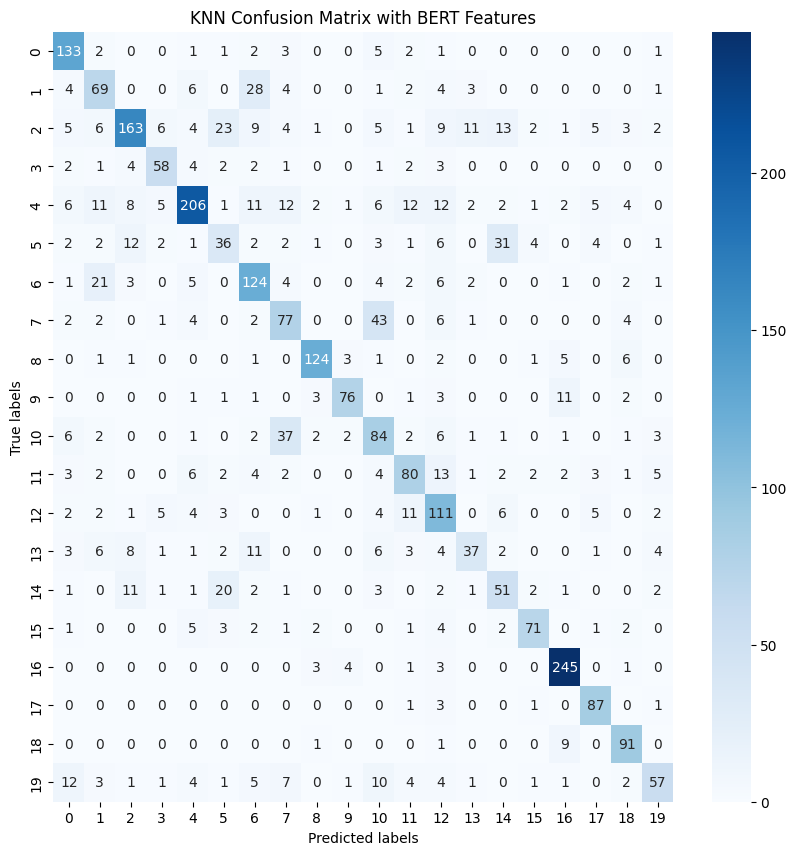

In [6]:
run_knn(X, y, 'KNN Confusion Matrix with BERT Features', scale_features=False)